<a href="https://colab.research.google.com/github/mohameddhameem/algorithmic-trading/blob/main/RL%20Intro/RL%20Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow-gpu==1.15.0 tensorflow==1.15.0 gym-anytrading gym stable-baselines

     |████████████████████████████████| 411.5 MB 8.1 kB/s 
     |████████████████████████████████| 412.3 MB 28 kB/s 
     |████████████████████████████████| 171 kB 72.7 MB/s 
     |████████████████████████████████| 240 kB 66.2 MB/s 
     |████████████████████████████████| 503 kB 65.8 MB/s 
     |████████████████████████████████| 3.8 MB 48.3 MB/s 
     |████████████████████████████████| 50 kB 8.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.16.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.0 which is incompatible.


In [2]:
import gym_anytrading
import gym

from stable_baselines import A2C
from stable_baselines.common.vec_env import DummyVecEnv

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


# Import Google Data downloaded from yfinance

In [3]:
df = pd.read_csv('GOOG_data.csv')

In [4]:
df ['Date'] = pd.to_datetime(df ['Date'])
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4508 entries, 2004-08-19 to 2022-07-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       4508 non-null   float64
 1   Low        4508 non-null   float64
 2   Open       4508 non-null   float64
 3   Close      4508 non-null   float64
 4   Volume     4508 non-null   float64
 5   Adj Close  4508 non-null   float64
dtypes: float64(6)
memory usage: 246.5 KB


In [5]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,30), window_size=5)

In [6]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break

info {'total_reward': 15.168148040771491, 'total_profit': 1.1881393002818281, 'position': 0}


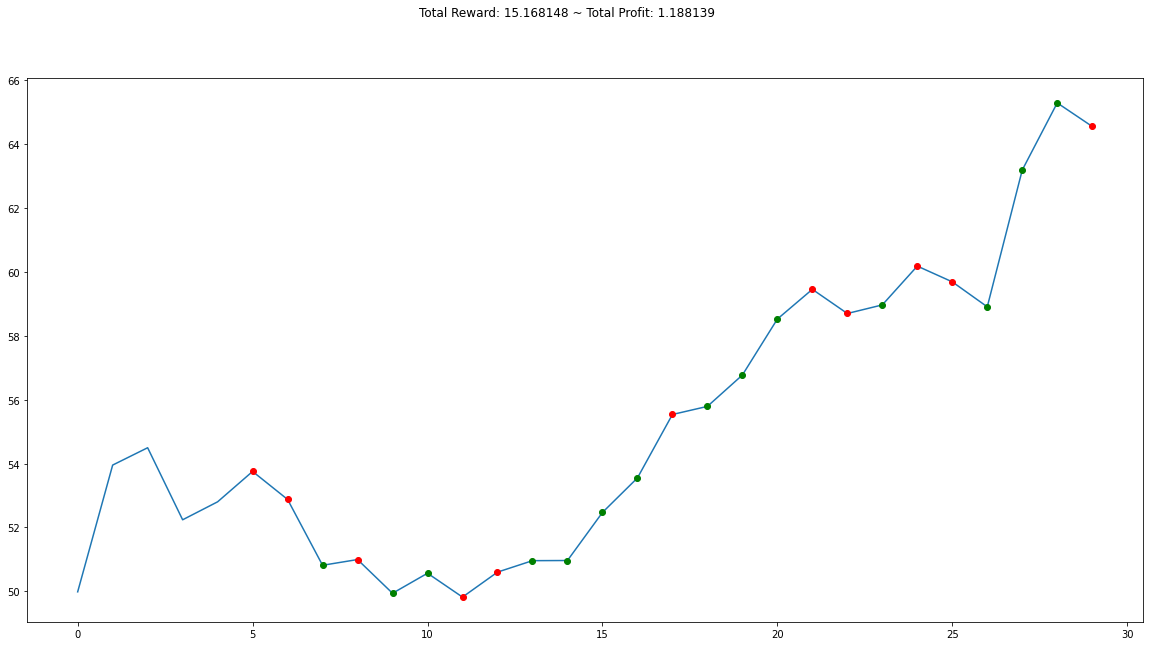

In [7]:
plt.figure(figsize=(20,10))
plt.cla()
env.render_all()
plt.show()

In [8]:
env_build = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,30), window_size=5)
env = DummyVecEnv([env_build])

In [9]:
model_train = A2C('MlpLstmPolicy', env, verbose=1) 
model_train.learn(total_timesteps=100000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


----------------------------------
| explained_variance | -5.01e+03 |
| fps                | 5         |
| nupdates           | 1         |
| policy_entropy     | 0.693     |
| total_timesteps    | 5         |
| value_loss         | 0.000258  |
----------------------------------
---------------------------------
| explained_variance | -0.0286  |
| fps                | 222      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 0.141    |
---------------------------------
---------------------------------
| explained_variance | 0.00076  |
| fps                | 

In [10]:
env = gym.make('stocks-v0', df=df, frame_bound=(25,35), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model_train.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': -0.7372360229492188, 'total_profit': 0.9739279924997487, 'position': 0}


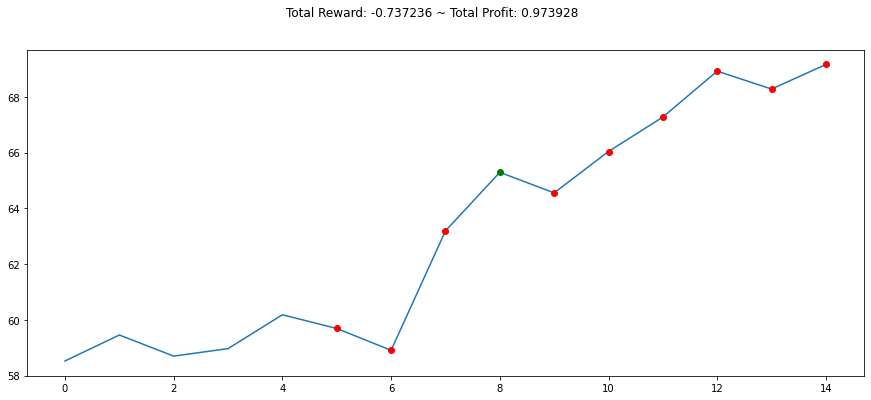

In [11]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()